<a href="https://colab.research.google.com/github/kushantp58/Neural-Nets-Repo/blob/master/Horse_human_classifier_using_Cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## getting the dataset from Laurence Moroney Blog
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-13 05:29:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   127MB/s    in 1.1s    

2020-10-13 05:29:03 (127 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
## create directories for horses and humans 
horse_train_dir = os.path.join('/tmp/horse-or-human/horses') ##horse directory
human_train_dir = os.path.join('/tmp/horse-or-human/humans') ## humans directory

In [4]:
## preview of the dataset 
train_horse_names = os.listdir(horse_train_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(human_train_dir)
print(train_human_names[:10])
print("\n Total number of horse images in the training dataset:",len(os.listdir(horse_train_dir)))
print("\n Total number of human images in the training dataset:",len(os.listdir(human_train_dir)))

['horse20-6.png', 'horse15-4.png', 'horse47-8.png', 'horse24-6.png', 'horse25-5.png', 'horse35-8.png', 'horse02-9.png', 'horse10-2.png', 'horse06-6.png', 'horse30-0.png']
['human03-05.png', 'human14-02.png', 'human16-13.png', 'human02-28.png', 'human14-12.png', 'human11-04.png', 'human16-12.png', 'human05-02.png', 'human10-28.png', 'human06-23.png']

 Total number of horse images in the training dataset: 500

 Total number of human images in the training dataset: 527


In [5]:
## preview of the dataset using the matplot paramters
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

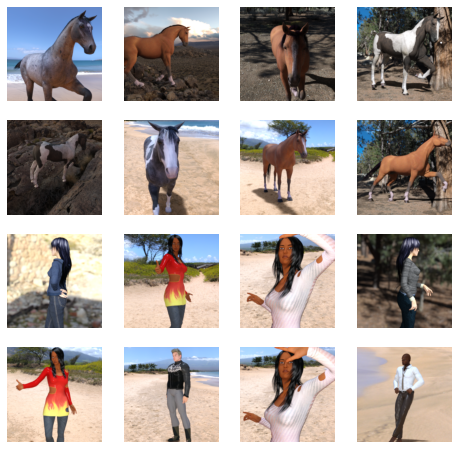

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols+4,nrows+4)
pic_index += 8
next_horse_pix = [os.path.join(horse_train_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(human_train_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]
for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [9]:
### start building model from scratch
import tensorflow as tf

## adding 5 layers of convolutions along with MaxPooling and since it's a binary classification we are going to use sigmoid activation
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dense(1,activation='sigmoid')           
])

In [10]:
## Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
## training the model with the binary cross entropy loss and the optimization we are using is the RMSProp which is better than
## stochastic gradient descent as it automates learning rate-tuning for us (Adam and Adagrad are unquivocally useful)

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [15]:
## Data preprocessing for reading the images from source folders and converting them into float32 and feeding them into our nw
## NOrmalizing the pixels in the image between [0,1]
## image data generator method in tf has rescale parameter which allows you to instantiate generators of augmented image batches 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size = 128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [16]:
## start training with 15 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 6s 717ms/step - loss: 0.8357 - accuracy: 0.5495
Epoch 2/15
8/8 [==============================] - 5s 617ms/step - loss: 0.6739 - accuracy: 0.5962
Epoch 3/15
8/8 [==============================] - 5s 634ms/step - loss: 0.6345 - accuracy: 0.7264
Epoch 4/15
8/8 [==============================] - 5s 616ms/step - loss: 0.5878 - accuracy: 0.7642
Epoch 5/15
8/8 [==============================] - 6s 702ms/step - loss: 0.3044 - accuracy: 0.9066
Epoch 6/15
8/8 [==============================] - 5s 615ms/step - loss: 0.2584 - accuracy: 0.9099
Epoch 7/15
8/8 [==============================] - 5s 624ms/step - loss: 0.1665 - accuracy: 0.9455
Epoch 8/15
8/8 [==============================] - 6s 712ms/step - loss: 0.0562 - accuracy: 0.9766
Epoch 9/15
8/8 [==============================] - 5s 622ms/step - loss: 0.1867 - accuracy: 0.9410
Epoch 10/15
8/8 [==============================] - 5s 608ms/step - loss: 0.3124 - accuracy: 0.8943
Epoch 11/15
8/8 [==

In [19]:
## Utilizing the model for making predictions
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x = np .expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0] > 0.5 :
    print(fn + "\t is a human")
  else:
    print(fn + "\t is a horse")

Saving hh1.jpg to hh1.jpg
[0.]
hh1.jpgis a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


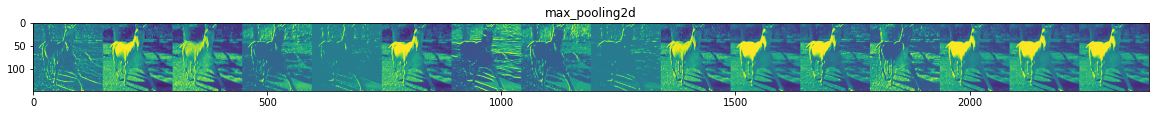

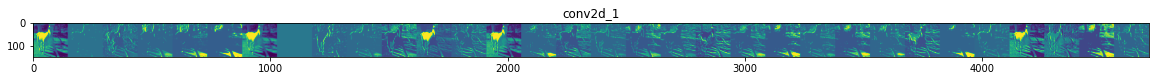

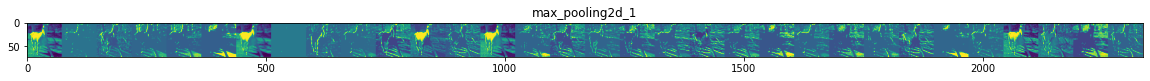

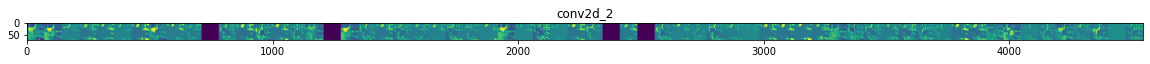

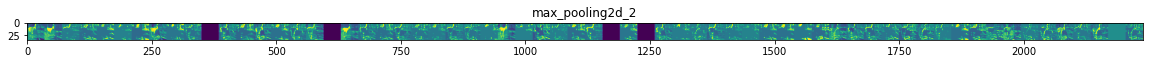

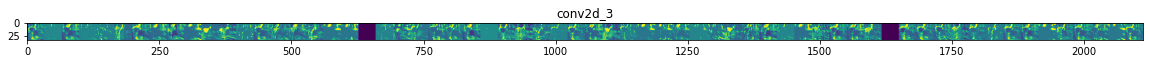

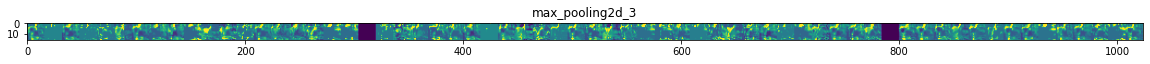

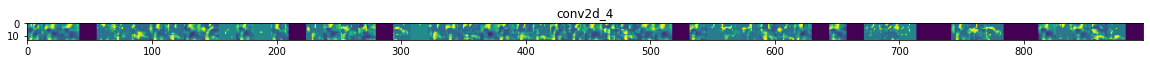

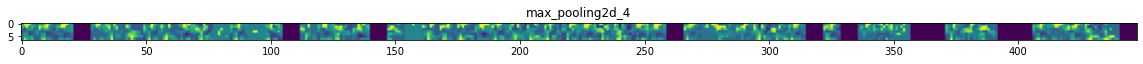

In [24]:
## Visualizing intermediate representations
## visualizing how an input gets transformed as it goes through our convnets 
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array , load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input,outputs = successive_outputs)

## Spawning a random input image from training sets
horse_img_files = [os.path.join(horse_train_dir,f) for f in train_horse_names]
human_img_files = [os.path.join(human_train_dir,f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path,target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255 # Rescaling them
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # This is only  for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')